# 911 Calls Exploratory Analysis

### A look into a dataset of 911 calls with 100,000 entries. Answers questions such as what is the most common reason for a given 911 call and what are the most frequent times and days to call. 

In [66]:
import numpy as np
import pandas as pd

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Read in data from file 911.csv

In [68]:
df = pd.read_csv('911.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [70]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Top 5 Zip Codes by number of calls

In [71]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

## Top 5 Townships by number of calls

In [72]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [73]:
df['title'].nunique()

110

## Created column for storing shortened inputs from the title column values. These new values then allow us further look at the different reasons for calls. We are able to discover that EMS is unquestionably the most common based on the data given.


In [74]:
new_col = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'] = new_col
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [75]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

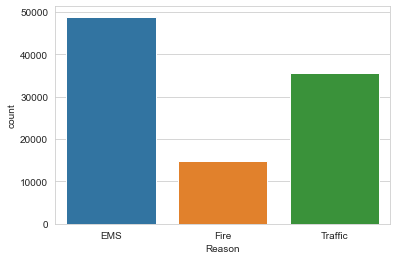

In [76]:
sns.countplot(x='Reason',data=df)

## Focusing on the data relating to what time and what day the calls occurred

In [77]:
type(df['timeStamp'][0])

str

In [78]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [79]:
Hour = df['timeStamp'].apply(lambda x: x.hour)
Month = df['timeStamp'].apply(lambda x: x.month)
Day_of_Week = df['timeStamp'].apply(lambda x: x.dayofweek)

In [80]:
df['Hour'] = Hour
df['Month']= Month
df['Day_of_Week'] = Day_of_Week

In [81]:
df['Day_of_Week'] = df['Day_of_Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [82]:
df['Day_of_Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day_of_Week, Length: 99492, dtype: object

## Graphically show the frequency of calls with respect to the day of the week and the month respectively. It is unsuprising to see a sharper decline with calls on Sunday.

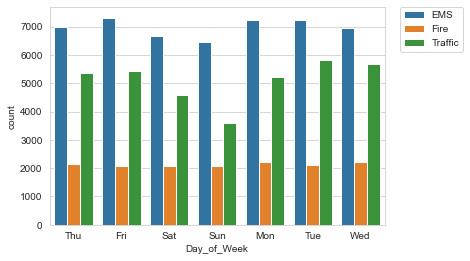

In [83]:
sns.countplot(x='Day_of_Week',data=df,hue='Reason')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.025))

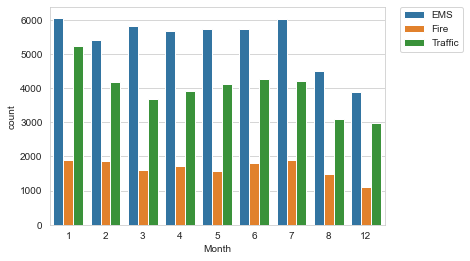

In [84]:
sns.countplot(x='Month',data=df,hue='Reason',)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.025))

In [85]:
byMonth = df.groupby('Month').count()

In [86]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


## Calls per month

<AxesSubplot:xlabel='Month'>

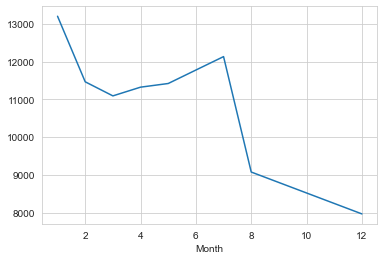

In [87]:
byMonth['twp'].plot()

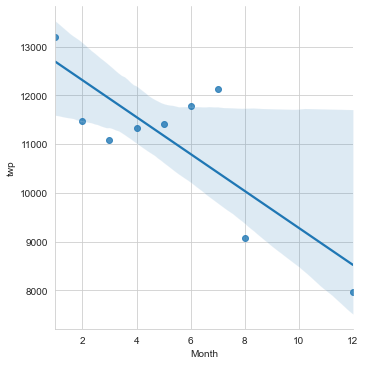

In [88]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [89]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [90]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [91]:
byDate = df.groupby('Date').count()

## Counts of 911 calls grouped by reason (Traffic, EMS, Fire) for calling grouped by date.

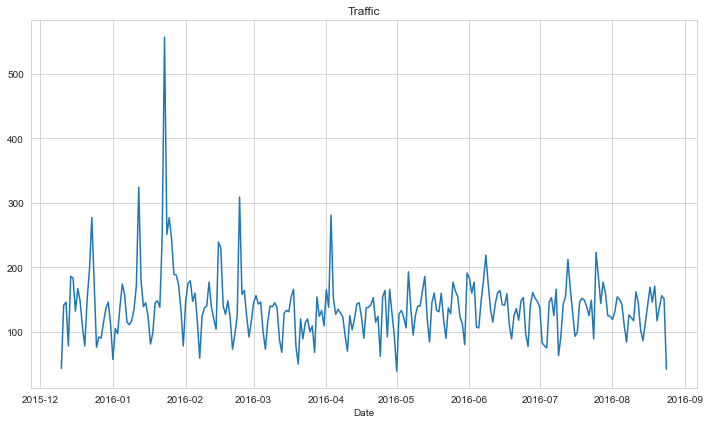

In [92]:
plt.figure(figsize=(10,6))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

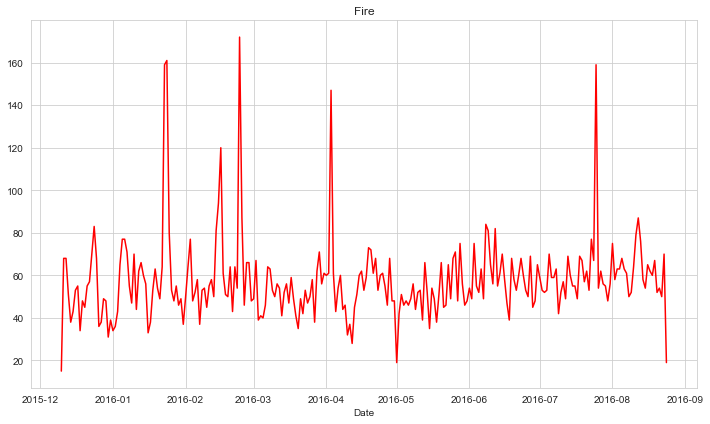

In [104]:
plt.figure(figsize=(10,6))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(color='red')
plt.title('Fire')
plt.tight_layout()

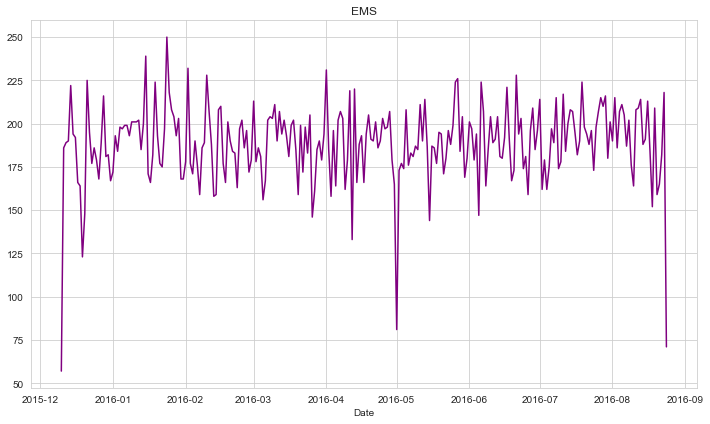

In [102]:
plt.figure(figsize=(10,6))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(color='purple')
plt.title('EMS')
plt.tight_layout()

## Using heatmaps and clustermaps to look closer at the day and time of day of calls

In [95]:
dayHour = df.groupby(by=['Day_of_Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day_of_Week'>

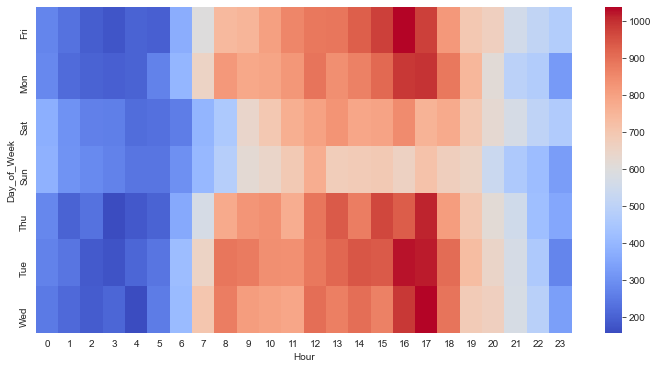

In [105]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

<Figure size 864x432 with 0 Axes>

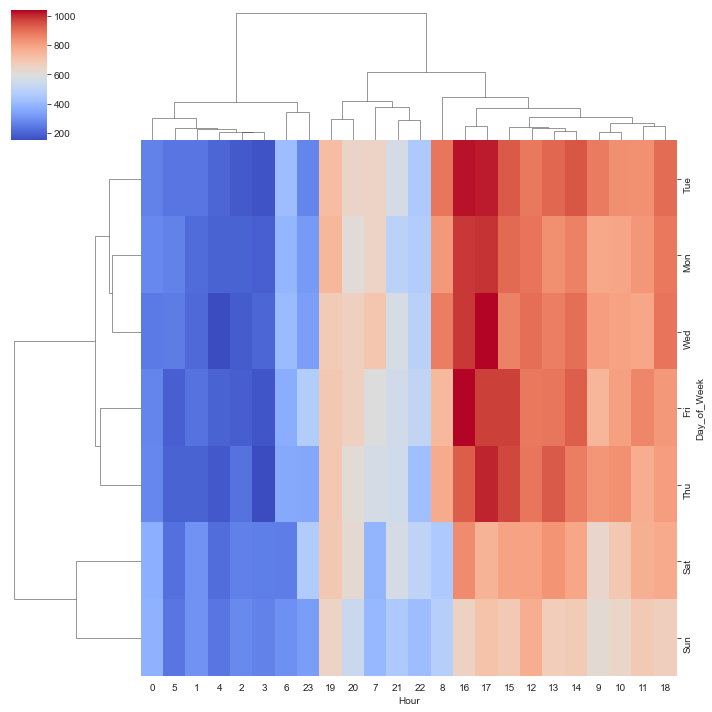

In [109]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap="coolwarm")

## It is very evident that a lot of calls are being placed very late at night and days such as sunday have generally a lower volume of calls

In [97]:
dayMonth = df.groupby(by=['Day_of_Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day_of_Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day_of_Week'>

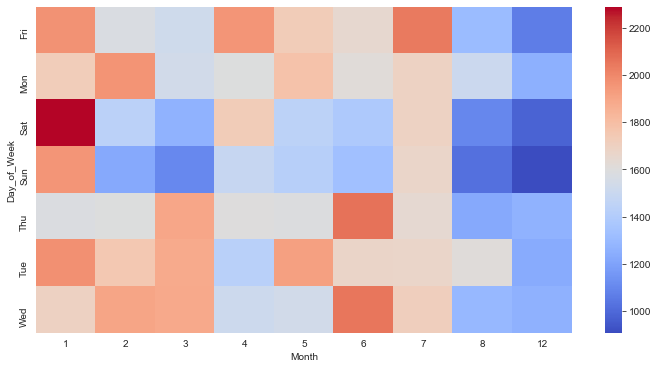

In [106]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap="coolwarm")

<Figure size 864x432 with 0 Axes>

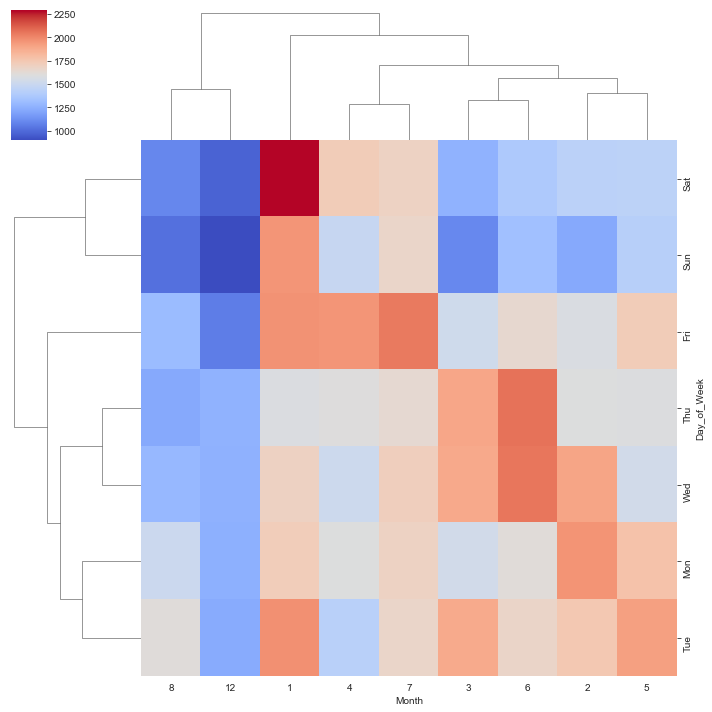

In [107]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap="coolwarm")